In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../")
from src.graph import NetworkGraph

In [15]:
from tqdm import tqdm

In [7]:
from flatland.envs.rail_env import RailEnv
from flatland.envs.observations import *
from flatland.envs.rail_generators import complex_rail_generator,rail_from_manual_specifications_generator,random_rail_generator, RailGenerator
from flatland.envs.schedule_generators import complex_schedule_generator, random_schedule_generator, ScheduleGenerator
from flatland.utils.rendertools import RenderTool
from flatland.envs.rail_env import RailEnv
from flatland.envs.observations import *
from flatland.envs.rail_generators import complex_rail_generator,rail_from_manual_specifications_generator,random_rail_generator, RailGenerator,sparse_rail_generator
from flatland.envs.schedule_generators import complex_schedule_generator, random_schedule_generator, ScheduleGenerator, sparse_schedule_generator
from flatland.utils.rendertools import RenderTool, AgentRenderVariant

In [8]:
def create_env_sparse(height,width,seed,number_of_agents=5):

    stochastic_data = {'prop_malfunction': 0,  # Percentage of defective agents
                       'malfunction_rate': 30,  # Rate of malfunction occurence
                       'min_duration': 3,  # Minimal duration of malfunction
                       'max_duration': 20  # Max duration of malfunction
                       }
    speed_ration_map = {1.: 1,  # Fast passenger train
                        1. / 2.: 0,  # Fast freight train
                        1. / 3.: 0,  # Slow commuter train
                        1. / 4.: 0}  # Slow freight train
    env = RailEnv(width=height,
                  height=width,
                  rail_generator=sparse_rail_generator(max_num_cities=number_of_agents+2,  
                                                       seed=seed, 
                                                       grid_mode=False,
                                                       max_rails_between_cities=4,
                                                       max_rails_in_city=4,
                                                       ),
                  schedule_generator=sparse_schedule_generator(speed_ration_map,seed = seed),
                  number_of_agents=number_of_agents,
                  stochastic_data=stochastic_data,  
                  obs_builder_object=GlobalObsForRailEnv(),
                  remove_agents_at_target=True
                  )
    env.reset()

    return env

In [9]:
def create_env(height,width,seed,number_of_agents=5):
    env = RailEnv(width=width,
              height=height,
              rail_generator=complex_rail_generator(nr_start_goal=20, nr_extra=1, 
                                                    min_dist=6, max_dist=99999, seed = seed),
              schedule_generator=complex_schedule_generator(),
              number_of_agents=number_of_agents)
    
    env.reset()
    
    return env

In [19]:
results = {}

In [20]:
for i in tqdm(range(1,50)):
    results[i*10] = []
    for repet in range(3):
        env = create_env(i*10,i*10,1+repet,1)
        T = 4 * 2 * (env.width + env.height + 20)
        test = NetworkGraph(np.array(env.rail.grid.tolist()))
        results[i*10].append(len(test.edges)*T)


 94%|█████████▍| 46/49 [2:25:58<29:11, 583.76s/it]

KeyboardInterrupt: 

In [21]:
results

{10: [103680, 99200, 96000],
 20: [607680, 578880, 589440],
 30: [1180160, 1178880, 1287680],
 40: [1737600, 1873600, 1800000],
 50: [2515200, 2828160, 2461440],
 60: [3483200, 3884160, 4453120],
 70: [5890560, 4052480, 4718080],
 80: [6791040, 5745600, 6606720],
 90: [8326400, 8025600, 7651200],
 100: [9232960, 8490240, 9166080],
 110: [11500800, 10782720, 13013760],
 120: [12192960, 13948480, 12933440],
 130: [13408640, 14689920, 17928960],
 140: [19252800, 15801600, 16147200],
 150: [26117120, 18887680, 19353600],
 160: [24077440, 21145280, 22962240],
 170: [25136640, 21392640, 27077760],
 180: [34649920, 26229120, 32448960],
 190: [34886400, 27731200, 34003200],
 200: [38606400, 38787840, 36388800],
 210: [38473600, 40170240, 36227840],
 220: [44402880, 49841920, 41900480],
 230: [41909760, 55150080, 39237120],
 240: [51680000, 55840000, 44752000],
 250: [55153280, 62474880, 55760640],
 260: [54095040, 67115520, 53835840],
 270: [68705280, 71742720, 52622080],
 280: [59698240, 8289

In [29]:
x_axis = []
y_axis = []
for x,ys in results.items():
    if x != 470:
        x_axis.append(x)
        y_axis.append((ys[0]+ys[1]+ys[2])/3)

In [55]:
x_axis_sparse = []
y_axis_sparse = []
for x,ys in results_sparse.items():
    if x < 470 and x >10:
        x_axis_sparse.append(x)
        y_axis_sparse.append((ys[0]+ys[1]+ys[2])/3)

In [58]:
ticks = [x_axis[7*i] for i in range(int(len(x_axis)/7)) ]
ticks.append(460)

In [60]:
ticks = [10, 80, 220, 360, 460]

In [30]:
import seaborn as sns
sns.set()

In [74]:
import matplotlib

In [75]:
matplotlib.rc('font', size=10)
matplotlib.rc('axes', titlesize=12)

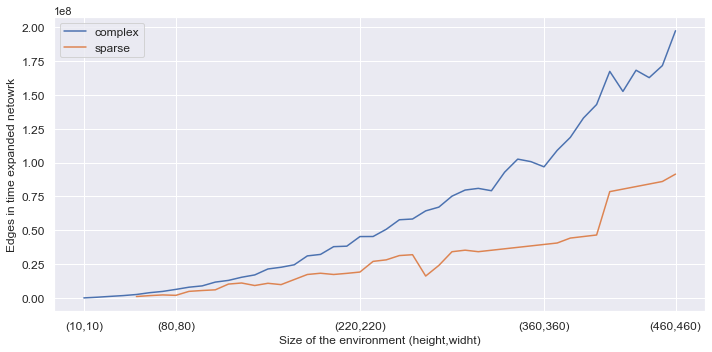

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (10,5))

squads = [f'({x},{x})' for x in ticks]

ax.set_xticks(ticks)
ax.set_xticklabels(squads)
plt.plot(x_axis,y_axis, label = "complex")
plt.plot(x_axis_sparse,y_axis_sparse,label = "sparse")
ax = plt.gca()
plt.legend()
plt.xlabel("Size of the environment (height,widht)")
plt.ylabel("Edges in time expanded netowrk")


for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
    
for item in [ax.title, ax.xaxis.label, ax.yaxis.label] :
    item.set_fontsize(12)
    
l = plt.legend()
for text in l.get_texts():
    text.set_fontsize(12)
    
plt.tight_layout()
plt.savefig("../reports/reportCharles/img/number_variables.jpg",dpi = 300)

In [49]:
results_sparse ={}

In [52]:
for i in tqdm(range(5,47)):
    results_sparse[i*10] = []
    for repet in range(3):
        env = create_env_sparse(i*10,i*10,1+repet,1)
        T = 4 * 2 * (env.width + env.height + 20)
        test = NetworkGraph(np.array(env.rail.grid.tolist()))
        results_sparse[i*10].append(len(test.edges)*T)



  0%|          | 0/42 [00:00<?, ?it/s]

  2%|▏         | 1/42 [00:01<00:42,  1.03s/it]

  5%|▍         | 2/42 [00:02<00:51,  1.28s/it]

  7%|▋         | 3/42 [00:05<01:04,  1.65s/it]

 10%|▉         | 4/42 [00:06<01:00,  1.60s/it]

 12%|█▏        | 5/42 [00:13<01:57,  3.18s/it]

 14%|█▍        | 6/42 [00:20<02:36,  4.36s/it]

 17%|█▋        | 7/42 [00:28<03:02,  5.20s/it]

 19%|█▉        | 8/42 [00:49<05:39,  9.99s/it]

 21%|██▏       | 9/42 [01:10<07:21, 13.38s/it]

 24%|██▍       | 10/42 [01:24<07:11, 13.49s/it]

 26%|██▌       | 11/42 [01:49<08:44, 16.92s/it]

 29%|██▊       | 12/42 [02:10<09:10, 18.37s/it]

 31%|███       | 13/42 [02:35<09:50, 20.35s/it]

 33%|███▎      | 14/42 [03:05<10:51, 23.27s/it]

 36%|███▌      | 15/42 [03:36<11:25, 25.40s/it]

 38%|███▊      | 16/42 [04:14<12:36, 29.09s/it]

 40%|████      | 17/42 [04:51<13:08, 31.56s/it]

 43%|████▎     | 18/42 [05:21<12:30, 31.29s/it]

 45%|████▌     | 19/42 [06:14<14:26, 37.68s/it]

 48%|████▊     | 20/42 [07:06<15:26,

In [54]:
results_sparse

{10: [],
 50: [1117440, 1004160, 1246080],
 60: [1357440, 2016000, 1935360],
 70: [1551360, 2304000, 3020800],
 80: [1509120, 1975680, 2494080],
 90: [3689600, 4860800, 6201600],
 100: [4058560, 5790400, 6821760],
 110: [4427520, 6316800, 7441920],
 120: [6152640, 11935040, 12829440],
 130: [6625920, 12853120, 13816320],
 140: [7454400, 6000000, 14265600],
 150: [9384960, 6400000, 16865280],
 160: [5418240, 6800000, 17478720],
 170: [5736960, 7200000, 27999360],
 180: [6055680, 16549760, 29554880],
 190: [6374400, 17420800, 31110400],
 200: [6693120, 18291840, 27182400],
 210: [7011840, 19162880, 28476800],
 220: [8088640, 20033920, 29440000],
 230: [8440320, 42024960, 30720000],
 240: [8792000, 43776000, 32000000],
 250: [22439040, 38355200, 33280000],
 260: [23302080, 39830400, 32840640],
 270: [16970240, 22704640, 9040640],
 280: [17576320, 45258560, 9363520],
 290: [18182400, 46819200, 37584000],
 300: [18788480, 48379840, 38836800],
 310: [19394560, 43151360, 40089600],
 320: [200

In [5]:
env = create_env(5,7,1,5)

In [6]:
env_renderer = RenderTool(env,screen_height=1200,screen_width=1200,
                          agent_render_variant=AgentRenderVariant.AGENT_SHOWS_OPTIONS_AND_BOX,
                          show_debug=True)
env_renderer.render_env(show=True, show_predictions=False, show_observations=False)

In [7]:
from src.flows import *
from src.graph import *

In [8]:
test = NetworkGraph(np.array(env.rail.grid.tolist()))

/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


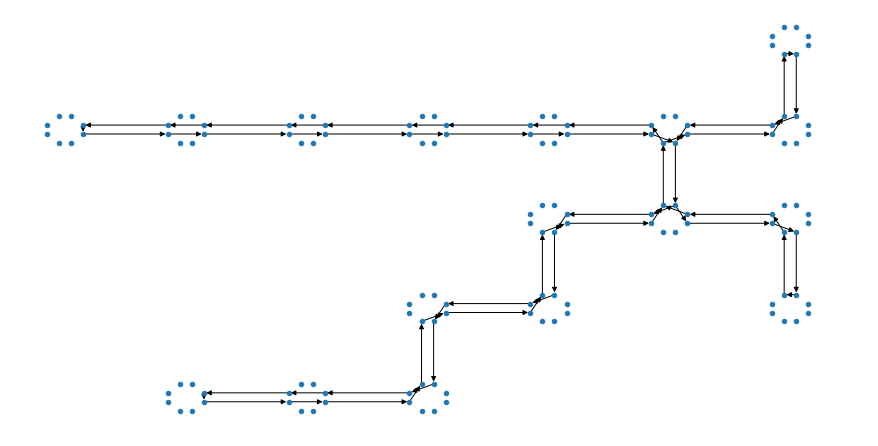

In [9]:
test.show(title= "test_flatland_network.jpg")

In [11]:
img = env_renderer.get_image()

In [12]:
from PIL import Image

In [13]:
image = Image.fromarray(img)

In [17]:
image.save("env.png")

In [ ]:

import networkx as nx

G=nx.star_graph(2)
pos=nx.spring_layout(G)
colors=range(2)
nx.draw(G,pos,node_color='#A0CBE2',edge_color=colors,width=4,edge_cmap=plt.get_cmap("CMRmap"),with_labels=False)
plt.savefig("edge_colormap.png") # save as png
plt.show() # display


In [ ]:
x = [0,1,2,3,4,5,6,7]

In [ ]:
#plt.subplot(111, facecolor=(46/255., 48/255., 55/255.))
plt.plot(x,x)
plt.savefig("test.png")

In [ ]:
x = np.array(x)

In [ ]:
plt.rcParams['savefig.facecolor'] = (46/255., 48/255., 55/255.)
plt.rcParams['axes.facecolor'] = (46/255., 48/255., 55/255.)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.spines['bottom'].set_color("white")
ax.spines['top'].set_color("white") 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.title.set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
fig.set_facecolor((46/255., 48/255., 55/255.))
ax.set_facecolor((46/255., 48/255., 55/255.))


plt.plot(x,x, label = "wtf")
plt.xlabel("wtf")
plt.title("coucou")

#l = plt.legend()
#for text in l.get_texts():
#    text.set_color("white")



ax = plt.gca()
plt.savefig("test.png")

In [ ]:
fig=plt.figure()
plt.rcParams['axes.facecolor'] = (46/255., 48/255., 55/255.)

# Plot the data and set the labels.
plt.plot(x,x,color='r', label ="wtf")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Save the figure to a file
plt.savefig("face.png")

In [ ]:
plt.plot(x,x)
plt.show()

In [ ]:
import pylab as plt
plt.plot(x, label="randn")

leg = plt.legend(framealpha = 0, loc = 'best')
for text in leg.get_texts():
    plt.setp(text, color = 'w')